<a href="https://colab.research.google.com/github/CarlaLS/Entregas-CoderHouse-Ciencias-de-Datos/blob/main/ProyectoQualityWine_ParteII_Salamone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto: Comportamiento de la calidad de vinos

# Resumen
Este estudio tiene como objetivo predecir la calidad del vino utilizando modelos de aprendizaje automático,
tales como Random Forest, Decision Tree y XGBoost. Se realizó un análisis de datos exploratorio (EDA)
para comprender y preparar el conjunto de datos para el modelado. Se aplicaron técnicas como el manejo
de valores atípicos y la normalización de datos. Para abordar el desequilibrio de clases, se empleó la técnica
de sobremuestreo de minorías sintéticas (SMOTE). Los modelos se evaluaron en función de métricas que
incluyen exactitud, precisión, recuperación y puntuación f1. Los resultados indicaron que XGBoost logró la
mayor precisión con un 96 %, seguido de Random Forest con un 95 % y Decision Tree con un 92 %.
XGBoost fue identificado como el modelo más eficaz debido a su alta precisión y rendimiento equilibrado.
Random Forest también fue muy eficaz y robusto, y sirvió como una alternativa sólida. A pesar de la menor
precisión, Decision Tree proporcionó una interpretabilidad valiosa. Este estudio proporciona un enfoque
integral para predecir la calidad del vino, destacando las fortalezas y la efectividad de cada modelo
evaluado.
# Introducción
La calidad del vino es un aspecto crucial para su aceptación en el mercado y su valor comercial, es por ello
que la Bodega “XXXX”, situada en Valle de Uco, Mendoza; nos presentó su problemática para poder
mejorar y predecir la calidad de sus vinos tintos.
Cada uno de los parámetros químicos del vino aporta información de relevancia. Los azúcares suelen
medirse al finalizar la fermentación alcohólica para tener una prueba de que las levaduras han consumido
la totalidad (o casi) de los azúcares naturalmente presentes en el mosto.
Las medidas de sulfuroso, en combinación con el pH del vino, sirven para conocer qué cantidad de sulfitos
están protegiendo el vino durante su elaboración en bodega. Así, en determinados momentos críticos
(especialmente cuando se va a embotellar y cuando se hacen trasiegos) es habitual tener que sulfitar para
proteger el vino (siempre con dosis calculadas) de oxidaciones y contaminaciones con microorganismos
como las bacterias acéticas. Estas bacterias darían lugar a un incremento de la acidez volátil, es decir, de
olores a ácido acético (vinagre) que estropearían el vino.
Los parámetros de acidez total y grado alcohólico son especialmente relevantes en los vinos que se van a
someter a crianza en barrica u otros recipientes, ya que ambos (acidez y alcohol) han de ser elevados para
que el vino evolucione favorablemente en el tiempo. También durante la fermentación maloláctica de los
tintos (principalmente), la disminución de la acidez total es uno de los parámetros que sirven para
supervisar que ésta transcurre de forma adecuada.
La predicción de la calidad del vino mediante técnicas de machine learning puede proporcionar a los
productores una herramienta valiosa para mejorar sus procesos de producción y asegurar un producto de
alta calidad.  
# Objetivo
Este proyecto tiene como objetivo explorar y comparar tres modelos de machine learning para predecir la
calidad del vino basado en sus características químicas, físicas y sensoriales.


Este dataset (fuente: "http://www.kaggle.com") cuenta en principio con 1599 observaciones y 12 variables totales.



# Importación de las Librerías

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn import tree




In [ ]:
plt.style.use('seaborn')

<ipython-input-2-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Carga del Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_wine= pd.read_csv('/content/drive/MyDrive/DataSets/Quality_Wine.csv', sep=';' )
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df_wine.shape # para saber cuántas filas y columnas tiene el dataset

(1599, 12)

In [ ]:
df_wine.info() #describir tipo de datos y valores Nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   object 
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 150.0+ KB


# Preprocesamiento de Datos

En la tabla de más arriba se observa que no hay valores nulos.
Se observa además que las variables "densidad" y "alcohol" están tipificadas como "Object" y las mismas corresponden a "Float".

## Correción la variable alcohol de object a float

In [ ]:
df_wine["alcohol"].head(10)

0     9.4
1     9.8
2     9.8
3     9.8
4     9.4
5     9.4
6     9.4
7    10.0
8     9.5
9    10.5
Name: alcohol, dtype: object

In [ ]:
df_wine = df_wine[pd.to_numeric(df_wine["alcohol"], errors="coerce").notnull()]

df_wine["alcohol"] = df_wine["alcohol"].astype(float)

<ipython-input-9-5a3ef8823870>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wine["alcohol"] = df_wine["alcohol"].astype(float)


In [ ]:
df_wine.info() # verificar si se modificó el tipo de la variable alcohol

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1593 non-null   object 
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
 11  quality               1593 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 161.8+ KB


## Corrección de la variable densidad

In [ ]:
df_wine["density"].head(10)

0    0.9978
1    0.9968
2     0.997
3     0.998
4    0.9978
5    0.9978
6    0.9964
7    0.9946
8    0.9968
9    0.9978
Name: density, dtype: object

In [ ]:
# Convertir la  "density" en float
df_wine["density"] = pd.to_numeric(df_wine["density"], errors="coerce").astype(float)


df_wine["density"].dtype

dtype('float64')

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1593 non-null   float64
 1   volatile acidity      1593 non-null   float64
 2   citric acid           1593 non-null   float64
 3   residual sugar        1593 non-null   float64
 4   chlorides             1593 non-null   float64
 5   free sulfur dioxide   1593 non-null   float64
 6   total sulfur dioxide  1593 non-null   float64
 7   density               1592 non-null   float64
 8   pH                    1593 non-null   float64
 9   sulphates             1593 non-null   float64
 10  alcohol               1593 non-null   float64
 11  quality               1593 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [ ]:
df_wine.isnull().sum() # observación de datos faltantes

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 1
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:

df_wine = df_wine.dropna() #eliminación de dato faltante



In [ ]:
df_wine.isnull().sum() #verificación de la eliminación de datos faltantes

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1592 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1592 non-null   float64
 1   volatile acidity      1592 non-null   float64
 2   citric acid           1592 non-null   float64
 3   residual sugar        1592 non-null   float64
 4   chlorides             1592 non-null   float64
 5   free sulfur dioxide   1592 non-null   float64
 6   total sulfur dioxide  1592 non-null   float64
 7   density               1592 non-null   float64
 8   pH                    1592 non-null   float64
 9   sulphates             1592 non-null   float64
 10  alcohol               1592 non-null   float64
 11  quality               1592 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.7 KB


*El dataframe tiene 1592 filas y 12 columnas. Se corrigieron los datos faltantes*. Se corrigieron los tipos de las variables densidad y alcohol





# Análisis de los datos

In [ ]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000,1592.000000
mean,8.316646,0.527494,0.270986,2.537845,0.087511,15.881281,46.405779,2.151838,3.311363,0.658040,10.422079,5.633794
std,1.734891,0.179114,0.194890,1.410263,0.047153,10.467770,32.890552,9.369309,0.154139,0.169744,1.064184,0.808309
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,100.369000,4.010000,2.000000,14.900000,8.000000


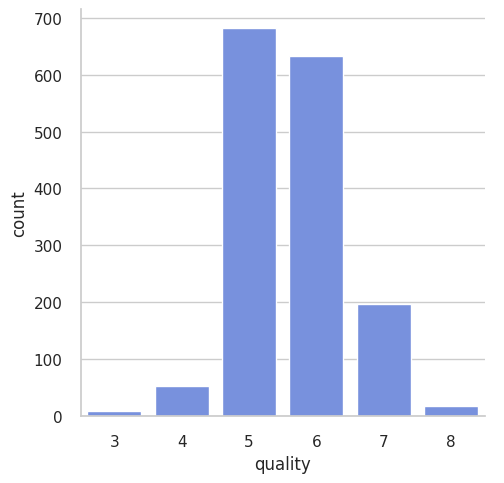

In [ ]:
# número de valores en cada calidad
sns.set(style="whitegrid", palette="coolwarm")
sns.catplot(x='quality', data = df_wine, kind = 'count')

de la grafica de calidad se observa que la mayoria de los valores se encuentran entre la calidad 5 y 6 .

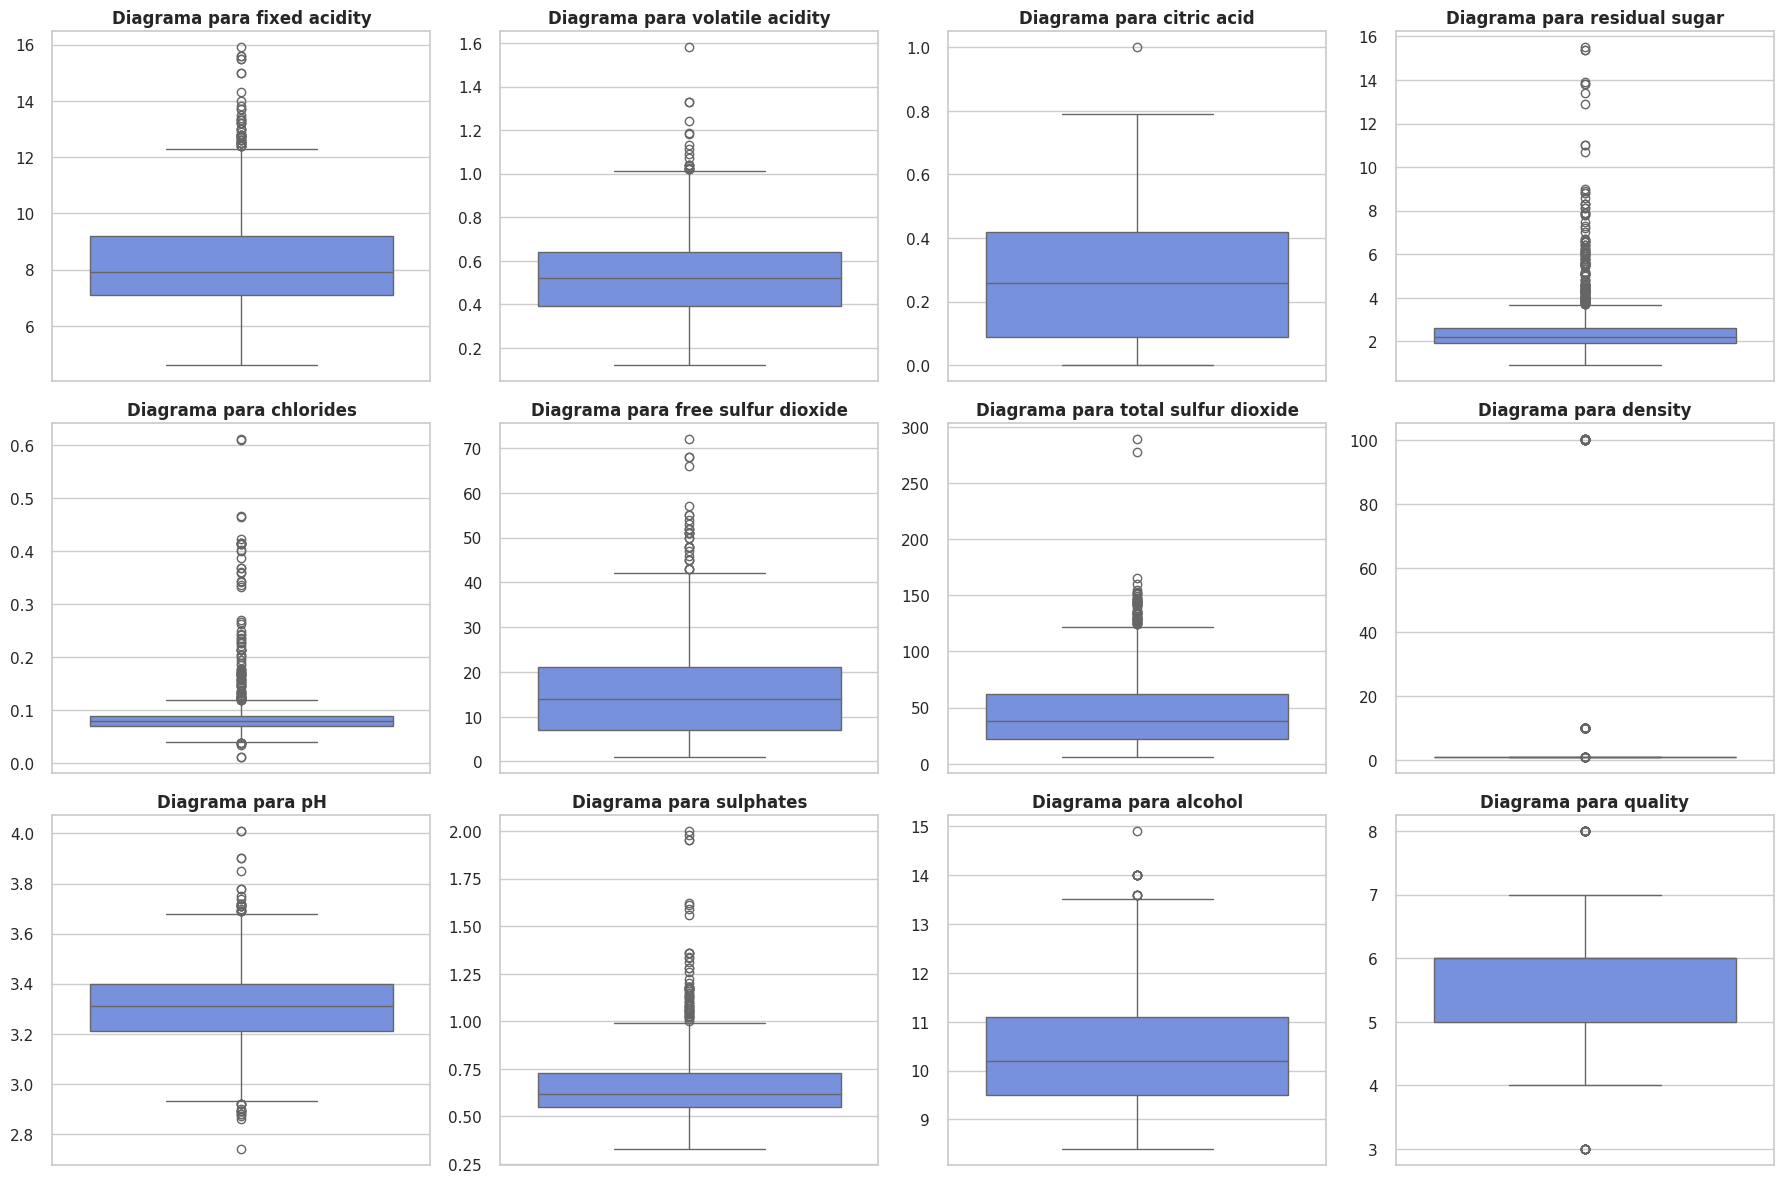

In [ ]:
# diagrama de cajas y bigotes de cada una de las variables para analizar outliers

# Configuración de estilo para los gráficos
sns.set(style="whitegrid", palette="coolwarm")

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Iterar sobre cada columna en el dataframe
for i, col in enumerate(df_wine.columns):
    ax = axes[i // 4, i % 4]

    # Crear el gráfico de cajas y bigotes para cada columna
    sns.boxplot(y=col, data=df_wine, ax=ax)

    # Añadir título y etiquetas
    ax.set_title(f'Diagrama para {col}', fontsize=12, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar espacio entre los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


El diagrama de cajas de las diferentes variables. La mayoría presenta
valores atípicos. Por ejemplo; la variable densidad tiene un IQR muy estrecho (entre 0.99 y 1) y valores
atípicos muy altos (100), el dióxido de azufre total tiene un IQR entre 25 y 75 teniendo muchos valores
atípicos por encima de 100.
De acuerdo a lo expuesto más arriba se decide hacer un tratamiento de los outliers utilizando el método
intercuartil (IQR).

In [ ]:
# Calcular el IQR para cada característica
Q1 = df_wine.quantile(0.25)
Q3 = df_wine.quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_filtered = df_wine[~((df_wine < (Q1 - 1.5 * IQR)) |(df_wine > (Q3 + 1.5 * IQR))).any(axis=1)]

# Verificar el tamaño del nuevo DataFrame
print(df_filtered.shape)
print(df_wine.shape)

(1152, 12)
(1592, 12)


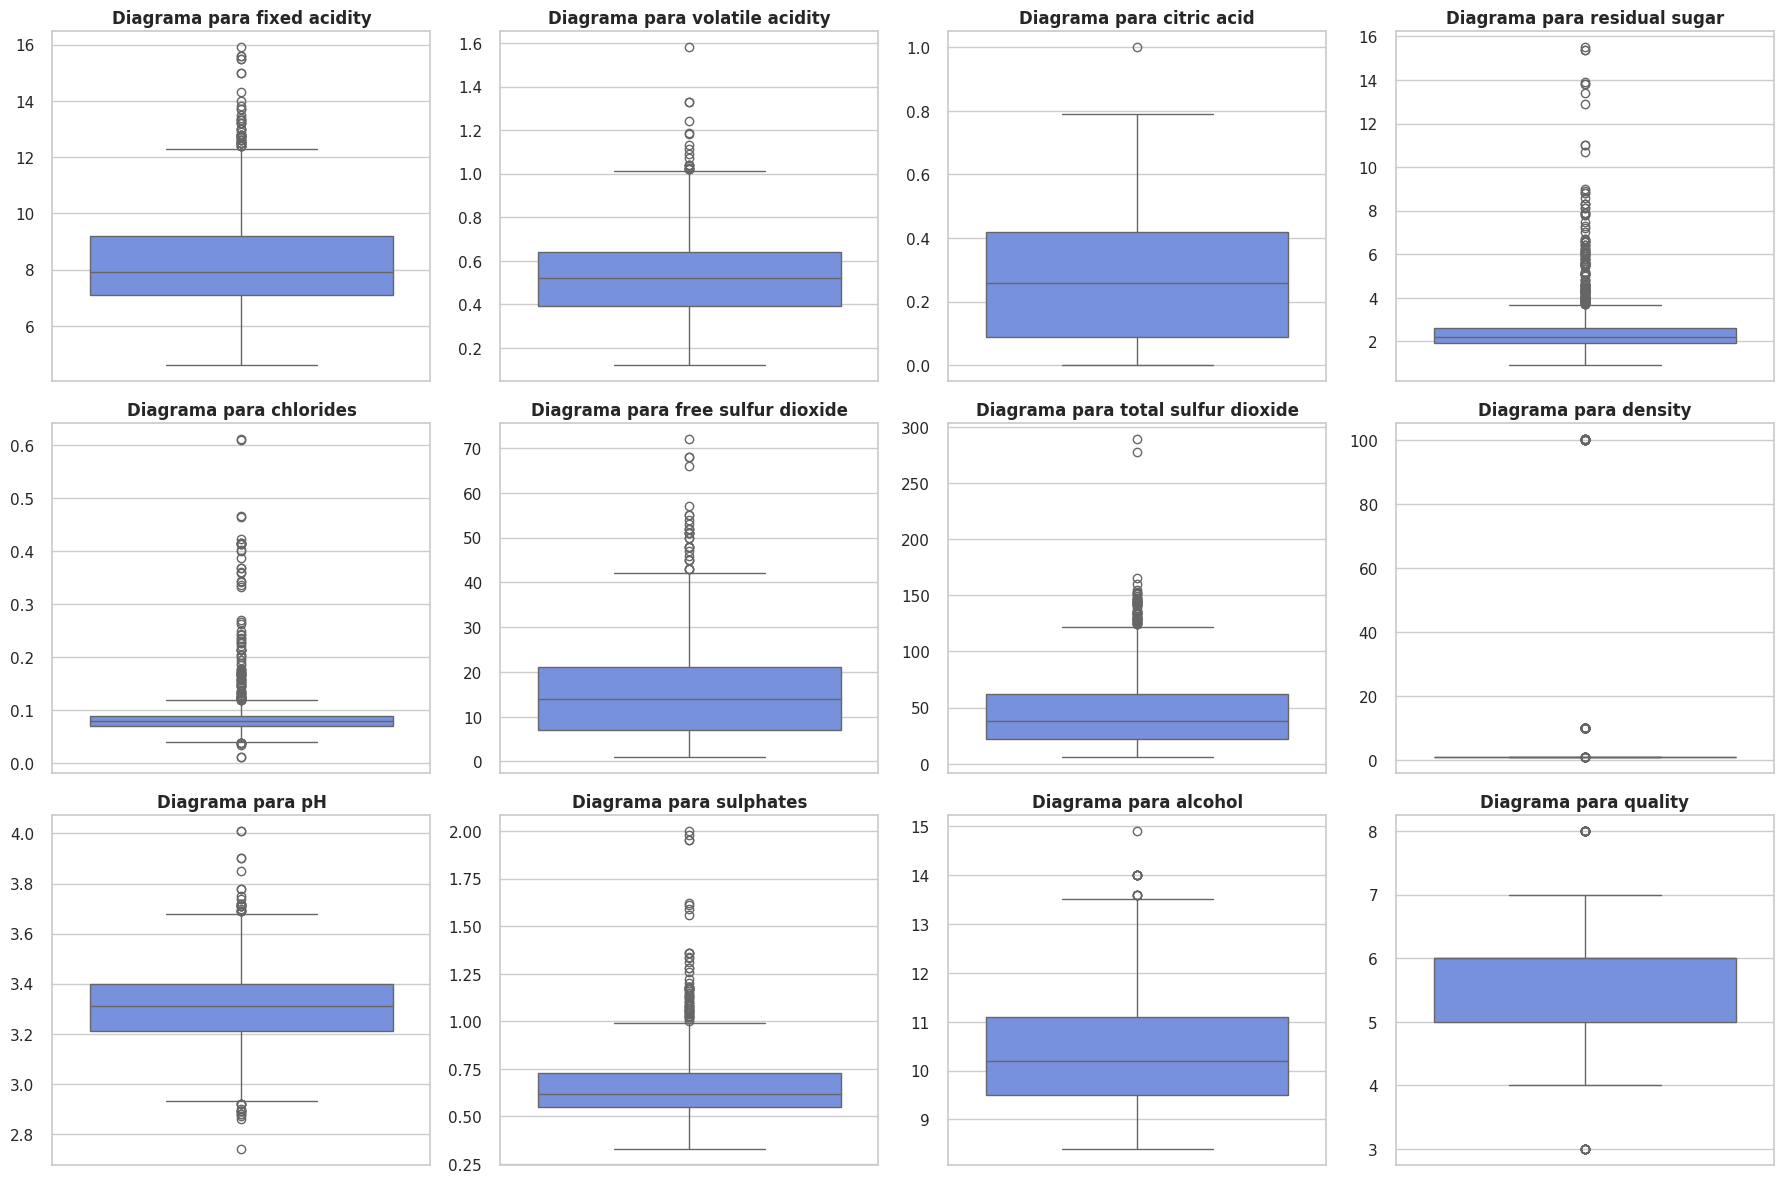

In [ ]:
# diagrama de cajas de bigotes con df_filtered


# Configuración de estilo para los gráficos
sns.set(style="whitegrid", palette="coolwarm")

# Crear la figura y los ejes para los subgráficos
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 12))

# Iterar sobre cada columna en el dataframe
for i, col in enumerate(df_filtered.columns):
    ax = axes[i // 4, i % 4]

    # Crear el gráfico de cajas y bigotes para cada columna
    sns.boxplot(y=col, data=df_wine, ax=ax)

    # Añadir título y etiquetas
    ax.set_title(f'Diagrama para {col}', fontsize=12, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

# Ajustar espacio entre los gráficos
plt.tight_layout()

# Mostrar la gráfica
plt.show()


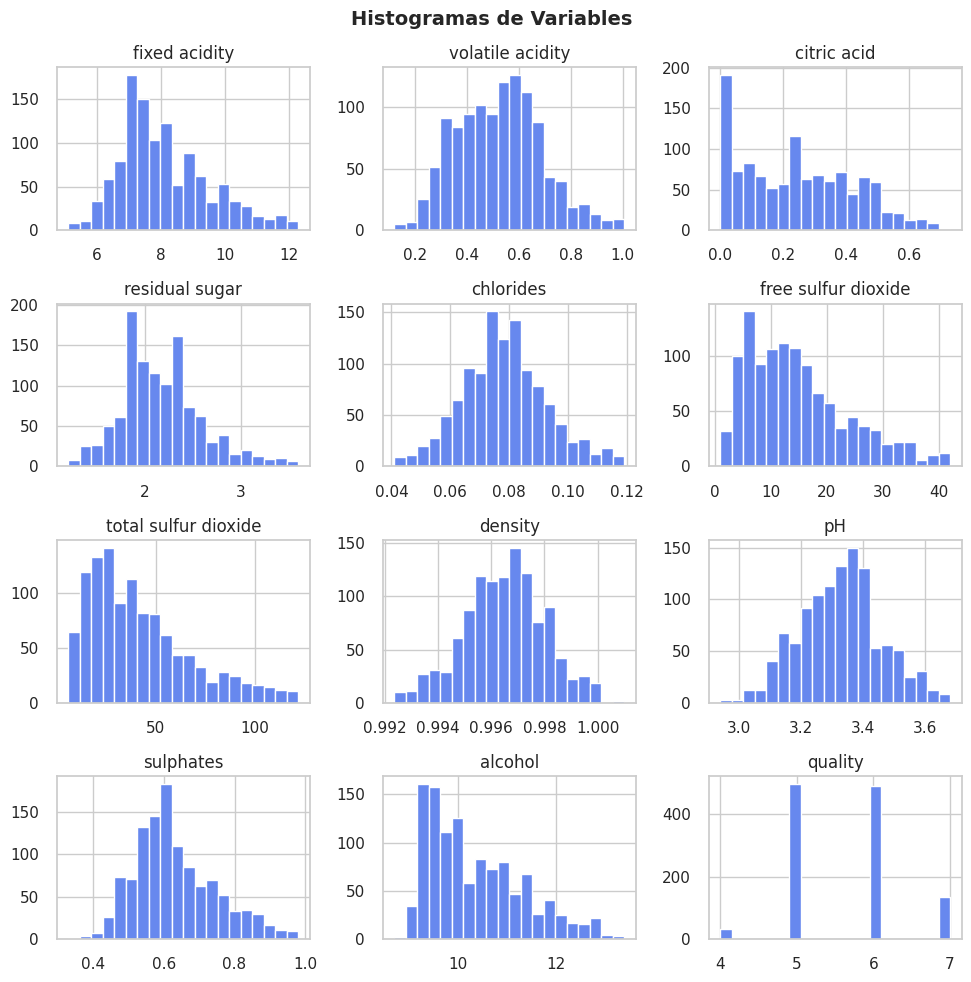

In [ ]:
# histograma de todas la variables

sns.set(style="whitegrid", palette="coolwarm")
df_filtered.hist(bins=20, figsize=(10, 10))
plt.suptitle('Histogramas de Variables', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


Se puede observar una leve distribución asimétrica de acidez fija, acidez volátil, azúcar residual, dióxido de azufre libre, dióxido de azufre total, sulfatos, alcohol. El ácido cítrico muestra dos agrupaciones principales de datos. Las variables cloruros, densidad y pH se comportan aproximadamente con una distribución normal. La variable calidad muestra una distribución discreta.  


In [ ]:
df_filtered.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000,1152.000000
mean,8.104427,0.523394,0.243785,2.173351,0.078323,14.982639,42.072049,0.996507,3.326163,0.630339,10.357248,5.629340
std,1.407929,0.164843,0.177893,0.431444,0.014312,8.763702,26.074461,0.001519,0.130994,0.115042,0.968492,0.722439
min,5.100000,0.120000,0.000000,1.200000,0.041000,1.000000,6.000000,0.992360,2.940000,0.330000,8.700000,4.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,8.000000,22.000000,0.995500,3.240000,0.550000,9.500000,5.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,36.000000,0.996560,3.330000,0.610000,10.100000,6.000000
75%,8.925000,0.631250,0.390000,2.400000,0.086250,20.000000,55.000000,0.997460,3.410000,0.700000,11.000000,6.000000
max,12.300000,1.005000,0.730000,3.600000,0.119000,42.000000,122.000000,1.001000,3.680000,0.980000,13.400000,7.000000


Correlación

Correlación Positiva

Correlación Negativa

In [ ]:
correlation = df_filtered.corr()

<Axes: >

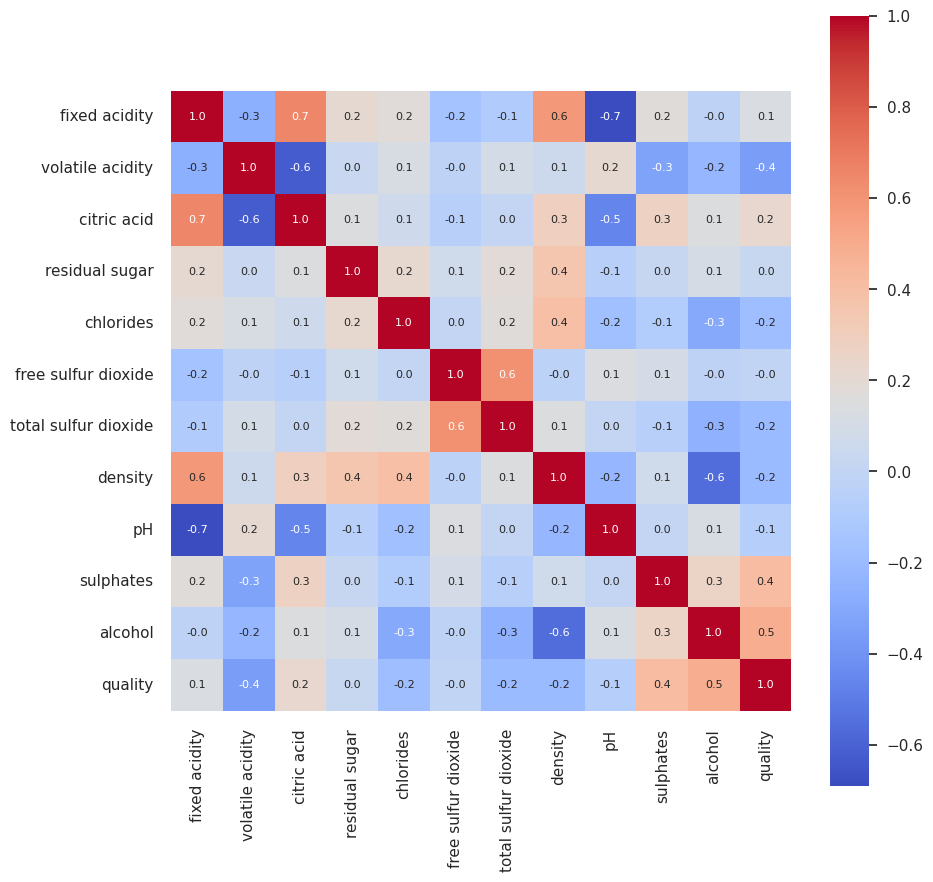

In [ ]:
# construccion de mapa de calor para comprender la correlacion entre columnas
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.1f', annot = True, annot_kws={'size':8},  cmap="coolwarm")

El mapa de calor de todas las variables, se puede apreciar que existe una correlación positiva entre la variable alcohol vs calidad, y sulfatos vs calidad. Hay una correlación negativa entre la variable acidez volátil vs calidad.

In [ ]:
# Separación de la variable calidad para que sea dependiente, se modifican los parámetros de los valores 3,4,5, 6 como cero (mala calidad), valores >= 7 como 1 (buena calidad)
X = df_filtered.drop('quality', axis=1)
y = df_filtered['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

# Balanceo de clases usando SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# División de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Verificación de la distribución de clases después del remuestreo
print("Class distribution after resampling:")
print(y_resampled.value_counts())
print(y.shape,y_train.shape, y_test.shape)

Class distribution after resampling:
quality
0    1018
1    1018
Name: count, dtype: int64
(1152,) (1628,) (408,)


In [ ]:
# modelo de regresión lineal para df_filtered

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionar las características y la variable objetivo
X = df_filtered[['alcohol', 'sulphates']]
y = df_filtered['quality']


# Crear Modelo
model = LinearRegression()


model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluar Modelo
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Mean Squared Error: 0.12197570802265173
R-squared: 0.5120854437034076


el valor de obtenido  R-Squared= 0.513 es bajo para poder utilizar el modelo de regresión lineal.

# Selección  de Modelos de predicción

In [ ]:

# Modelo de Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred = rf.predict(X_test)

# Evaluación del modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report: Random Forest Classifier")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[190  13]
 [  6 199]]

Classification Report: Random Forest Classifier
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       203
           1       0.94      0.97      0.95       205

    accuracy                           0.95       408
   macro avg       0.95      0.95      0.95       408
weighted avg       0.95      0.95      0.95       408



El modelo de Random Forest muestra una precisión global del 95%, lo que sugiere que predice
correctamente la mayoría de los casos.
Ambos f1-scores para las clases 0 y 1 son altos (0.95), indicando un buen balance entre precisión y recall.
                                                                                Aunque hay algunos falsos positivos (13) y falsos negativos (6), el número es relativamente bajo en
comparación con el total de predicciones, lo que sugiere que el modelo es bastante fiable.


In [ ]:
# arbol de decisiones para df_filtered

# Definir el clasificador de árbol de decisiones
clf = tree.DecisionTreeClassifier()

# Entrenar el modelo
clf = clf.fit(X_train, y_train)

# Realizar predicciones
y_pred_tree = clf.predict(X_test)

# Evaluar el modelo
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report: Decision Tree Classifier")
print(classification_report(y_test, y_pred_tree))



Confusion Matrix:
[[186  17]
 [ 19 186]]

Classification Report: Decision Tree Classifier
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       203
           1       0.92      0.91      0.91       205

    accuracy                           0.91       408
   macro avg       0.91      0.91      0.91       408
weighted avg       0.91      0.91      0.91       408



El modelo de Decision Tree muestra una precisión global del 92%, lo que sugiere que predice
correctamente la mayoría de los casos.
Ambos f1-scores para las clases 0 y 1 son altos (0.92), indicando un buen balance entre precisión y recall.
Aunque hay algunos falsos positivos (15) y falsos negativos (16), el número es relativamente bajo en
comparación con el total de predicciones, lo que sugiere que el modelo es bastante fiable.    

In [ ]:
#  XGB para df_filtered

# Crear una instancia de XGBClassifie
xgb_model = xgb.XGBClassifier(objective="binary:logistic", seed=42)

# Entrenar el modelo XGBClassifier
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo

print("\nXGBClassifier Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(f"Classification Report:\n{classification_report(y_test, y_pred_xgb)}")




XGBClassifier Model Evaluation:
Accuracy: 0.9583333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       203
           1       0.94      0.98      0.96       205

    accuracy                           0.96       408
   macro avg       0.96      0.96      0.96       408
weighted avg       0.96      0.96      0.96       408



El modelo XGBClassifier muestra una precisión global del 96%, lo que sugiere que predice correctamente la
gran mayoría de los casos.
Ambos f1-scores para las clases 0 y 1 son altos (0.96), indicando un excelente balance entre precisión y
recall.
Aunque hay algunos falsos positivos y falsos negativos, el número es relativamente bajo en comparación
con el total de predicciones, lo que sugiere que el modelo es extremadamente fiable.

# Análisis Comparativo entre los modelos
1. Precisión Global (Accuracy):
XGBoost mostró la mayor precisión (96%), seguido por Random Forest (95%) y Decision Tree (92%). Esto
indica que XGBoost es ligeramente superior en términos de precisión general.
2. Balance entre Precisión y Recall:
Todos los modelos mostraron un buen balance entre precisión y recall. Sin embargo, XGBoost y Random
Forest tuvieron f1-scores superiores (0.96 y 0.95, respectivamente) en comparación con Decision Tree
(0.92). Esto sugiere que XGBoost y Random Forest son más efectivos en manejar tanto falsos positivos
como falsos negativos.
Los modelos de Random Forest y XGBoost tienden a ser más complejos y robustos que los modelos de
árbol de decisión simples. Esto se refleja en su mayor precisión y mejor manejo de datos con
características más complejas.
XGBoost, debido a su naturaleza de boosting, generalmente es más robusto y menos propenso a
sobreajuste comparado con los modelos de árbol de decisión simples. Random Forest también es menos
propenso a sobreajuste debido a la combinación de múltiples árboles.
# Conclusiones y Recomendaciones
Basado en la precisión y el balance de métricas, XGBoost se destaca como el modelo más eficaz para
predecir la calidad del vino en este conjunto de datos. Su alta precisión y capacidad para manejar tanto
falsos positivos como falsos negativos lo hacen ideal para esta tarea.
El modelo de Random Forest también mostró un rendimiento muy sólido y sería una excelente
alternativa si la implementación de XGBoost no es factible por alguna razón. Su capacidad para
manejar datos complejos y su robustez general lo hacen una opción viable.